In [34]:
from Scripts.import_data import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import numpy as np

Zaimportowanie wartości rynkowej

In [35]:
#market_values to procentowe roczne zmiany wartości spółek, obliczone w notebooku "Market_value_importer"
market_values = pd.read_csv('./Data/market_values.csv')
market_values.set_index('Unnamed: 0', inplace=True)

Zaimportowanie danych dotyczących alokacji środków

In [36]:
balance_data = import_csv_dict_of_dataframes('./Data/companies_balance_sheet.csv')

for company, years in balance_data.items():
    for year, data in years.items():
        if company in market_values.index and year in market_values.columns:
            # Take only the second level of the MultiIndex
            data.index = data.index.droplevel(0)

Stworzenie jednego zbioru z wszystkimi danymi

In [49]:
columns = ['ASSETS','Property, plant and equipment','Exploration for and evaluation of mineral resources','Intangible assets','Goodwill','Investment property',
'Right-of-use assets','Investment in affiliates','Non-current financial assets','Non-current loans and receivables','Deferred income tax','Non-current deferred charges and accruals',
'Non-current derivative instruments','Other non-current assets','Inventories','Current intangible assets',
'Biological assets','Trade receivables','Loans and other receivables','Financial assets','Cash and cash equivalents','Accruals','Assets from current tax','Derivative instruments',
'Other assets','Assets held for sale and discontinuing operations','Called up capital','Own shares','EQUITY & LIABILITIES','Equity shareholders of the parent','Share capital',
'Called up share capital','Treasury shares','Supplementary capital','Valuation and exchange differences','Other capitals','Retained earnings / accumulated losses','Non-controlling interests',
'Non-current liabilities','Non-current liabilities from derivatives','Non-current loans and borrowings','Non-current liabilities from bonds','Non-current liabilities from finance leases',
'Non-current trade payables','Long-term provision for employee benefits','Deferred tax liabilities','Non-current provision','Other non-current liabilities','Non-current accruals (liability)',
'Current liabilities','Liabilities from derivatives','Financial liabilities (loans and borrowings)','Bond liabilities','Liabilities from finance leases','Trade payables','Employee benefits',
'Current tax liabilities','Provisions','Other liabilities','Accruals (liability)','Liabilities related to assets held for sale and discontinued operations', 'market_value']

rows = []
for company, years in balance_data.items():
    for year, market_data in years.items():
        new_row = {}
        for indicator, value in market_data.items():
            if indicator in columns:
                new_row[indicator] = value
            else:
                new_row[indicator] = 0
        if company in market_values.index and year in market_values.columns:
            new_row['market_value'] = market_values[year][company]
            rows.append(new_row)

data = pd.DataFrame(rows, columns=columns)
data

,ASSETS,"Property, plant and equipment",Exploration for and evaluation of mineral resources,Intangible assets,Goodwill,Investment property,Right-of-use assets,Investment in affiliates,Non-current financial assets,Non-current loans and receivables,...,Bond liabilities,Liabilities from finance leases,Trade payables,Employee benefits,Current tax liabilities,Provisions,Other liabilities,Accruals (liability),Liabilities related to assets held for sale and discontinued operations,market_value
0,48649.817,814.332,NaN,13067.498,NaN,NaN,NaN,NaN,3053.534,NaN,...,NaN,NaN,1197.853,NaN,NaN,NaN,NaN,466.396,NaN,107.934581
1,109262.821,18734.064000000002,NaN,17138.011,NaN,NaN,NaN,NaN,5094.282,NaN,...,NaN,NaN,5122.519,NaN,NaN,NaN,NaN,758.971,NaN,39.139118
2,155668.388,20380.205,NaN,24870.505,NaN,NaN,4007.699,NaN,NaN,NaN,...,NaN,12.653,5494.21,NaN,556.548,NaN,41.795,17256.979,NaN,23.231833
3,186339.222,26889.503,NaN,37859.517,NaN,NaN,4003.398,NaN,NaN,NaN,...,NaN,12.651,7444.283,NaN,1184.903,860.272,41.796,320.698,NaN,63.933486
4,219512.964,25946.479,NaN,59137.637,NaN,NaN,4281.361,NaN,NaN,NaN,...,NaN,14.734,6332.759,NaN,744.927,661.422,41.796,4169.079,NaN,22.300192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1778284,809413,NaN,36338,NaN,NaN,NaN,58102,NaN,20899,...,NaN,NaN,913510,4258,39660,10012,NaN,NaN,NaN,14.618363
1241,1790063,818103,NaN,29100,NaN,NaN,NaN,58102,NaN,22286,...,NaN,NaN,1011972,2327,2528,11769,NaN,NaN,NaN,6.546306
1242,2479535,905788,NaN,26674,NaN,NaN,35897,532325,NaN,11005,...,NaN,6488,704176,628,76761,8900,NaN,321194,NaN,-2.118575
1243,2513606,1053811,NaN,360038,NaN,NaN,83331,58102,NaN,52234,...,NaN,7175,586113,204,103458,11302,NaN,350508,NaN,6.060657


Czyszczenie danych

In [59]:
data = data.fillna(0)
data = data.apply(pd.to_numeric, errors='coerce')
data = data[data['ASSETS'] > 0]
data = data[data['market_value'] > 0]
y = data['market_value']
X = data.drop('market_value', axis=1)
X

,ASSETS,"Property, plant and equipment",Exploration for and evaluation of mineral resources,Intangible assets,Goodwill,Investment property,Right-of-use assets,Investment in affiliates,Non-current financial assets,Non-current loans and receivables,...,Financial liabilities (loans and borrowings),Bond liabilities,Liabilities from finance leases,Trade payables,Employee benefits,Current tax liabilities,Provisions,Other liabilities,Accruals (liability),Liabilities related to assets held for sale and discontinued operations
0,48649.817,814.332,0,13067.498,0.0,0.0,0.000,0.0,3053.534,0.0,...,0.000,0.0,0.000,1197.853,0.0,0.000,0.000,0.000,466.396,0.0
1,109262.821,18734.064,0,17138.011,0.0,0.0,0.000,0.0,5094.282,0.0,...,1452.203,0.0,0.000,5122.519,0.0,0.000,0.000,0.000,758.971,0.0
2,155668.388,20380.205,0,24870.505,0.0,0.0,4007.699,0.0,0.000,0.0,...,1303.717,0.0,12.653,5494.210,0.0,556.548,0.000,41.795,17256.979,0.0
3,186339.222,26889.503,0,37859.517,0.0,0.0,4003.398,0.0,0.000,0.0,...,1260.000,0.0,12.651,7444.283,0.0,1184.903,860.272,41.796,320.698,0.0
4,219512.964,25946.479,0,59137.637,0.0,0.0,4281.361,0.0,0.000,0.0,...,1260.000,0.0,14.734,6332.759,0.0,744.927,661.422,41.796,4169.079,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,758826.000,357311.000,0,42626.000,0.0,2442.0,0.000,0.0,2172.000,7270.0,...,68920.000,0.0,16559.000,192112.000,0.0,0.000,14003.000,2761.000,995.000,0.0
1235,475282.000,92004.000,0,8594.000,31172.0,9095.0,0.000,210.0,0.000,0.0,...,8809.000,0.0,0.000,205950.000,16184.0,0.000,2998.000,6663.000,475.000,0.0
1240,1778284.000,809413.000,0,36338.000,0.0,0.0,0.000,58102.0,0.000,20899.0,...,97060.000,0.0,0.000,913510.000,4258.0,39660.000,10012.000,0.000,0.000,0.0
1241,1790063.000,818103.000,0,29100.000,0.0,0.0,0.000,58102.0,0.000,22286.0,...,418770.000,0.0,0.000,1011972.000,2327.0,2528.000,11769.000,0.000,0.000,0.0


In [60]:
# zamiana na procenty
X_normalized = X.copy()

# ASSETS
columns_to_divide = X.columns[1:63]
X_normalized.iloc[:, 1:63] = X_normalized.iloc[:, 1:63].div(X['ASSETS'], axis=0)

In [61]:
# Detekcja i usuwanie anomalii

def delete_anomaly(X: pd.DataFrame, y: pd.DataFrame, threshold: float) -> pd.DataFrame:
    # Calculate the mean for each column except the first one
    mean_val = X[X.columns[1:63]].mean()
    
    # Calculate the absolute deviation from the mean for each column except the first one
    deviation = X[X.columns[1:63]].sub(mean_val).abs()

    # Create a boolean DataFrame where each element is True if it meets the condition
    condition = (deviation <= threshold)
    # Create a mask for rows where all columns meet the condition
    row_mask = condition.all(axis=1)
    # Filter the DataFrame using the row mask
    X_filtered = X[row_mask]
    y_filtered = y[row_mask]
    
    return X_filtered, y_filtered

In [62]:
X_norm, y_norm = delete_anomaly(X_normalized, y, 2)
X_norm = X_norm.drop('ASSETS', axis=1)

Uczenie modelu

In [63]:
X_norm

,"Property, plant and equipment",Exploration for and evaluation of mineral resources,Intangible assets,Goodwill,Investment property,Right-of-use assets,Investment in affiliates,Non-current financial assets,Non-current loans and receivables,Deferred income tax,...,Financial liabilities (loans and borrowings),Bond liabilities,Liabilities from finance leases,Trade payables,Employee benefits,Current tax liabilities,Provisions,Other liabilities,Accruals (liability),Liabilities related to assets held for sale and discontinued operations
0,0.016739,0.0,0.268603,0.000000,0.000000,0.000000,0.000000,0.062766,0.000000,0.001850,...,0.000000,0.0,0.000000,0.024622,0.000000,0.000000,0.000000,0.000000,0.009587,0.0
1,0.171459,0.0,0.156851,0.000000,0.000000,0.000000,0.000000,0.046624,0.000000,0.001446,...,0.013291,0.0,0.000000,0.046883,0.000000,0.000000,0.000000,0.000000,0.006946,0.0
2,0.130921,0.0,0.159766,0.000000,0.000000,0.025745,0.000000,0.000000,0.000000,0.003482,...,0.008375,0.0,0.000081,0.035294,0.000000,0.003575,0.000000,0.000268,0.110857,0.0
3,0.144304,0.0,0.203175,0.000000,0.000000,0.021484,0.000000,0.000000,0.000000,0.008144,...,0.006762,0.0,0.000068,0.039950,0.000000,0.006359,0.004617,0.000224,0.001721,0.0
4,0.118200,0.0,0.269404,0.000000,0.000000,0.019504,0.000000,0.000000,0.000000,0.004362,...,0.005740,0.0,0.000067,0.028849,0.000000,0.003394,0.003013,0.000190,0.018992,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0.470873,0.0,0.056174,0.000000,0.003218,0.000000,0.000000,0.002862,0.009581,0.005004,...,0.090825,0.0,0.021822,0.253170,0.000000,0.000000,0.018454,0.003639,0.001311,0.0
1235,0.193578,0.0,0.018082,0.065586,0.019136,0.000000,0.000442,0.000000,0.000000,0.016418,...,0.018534,0.0,0.000000,0.433322,0.034051,0.000000,0.006308,0.014019,0.000999,0.0
1240,0.455165,0.0,0.020434,0.000000,0.000000,0.000000,0.032673,0.000000,0.011752,0.039225,...,0.054581,0.0,0.000000,0.513703,0.002394,0.022302,0.005630,0.000000,0.000000,0.0
1241,0.457025,0.0,0.016256,0.000000,0.000000,0.000000,0.032458,0.000000,0.012450,0.048570,...,0.233941,0.0,0.000000,0.565328,0.001300,0.001412,0.006575,0.000000,0.000000,0.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(kernel='linear'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

Linear Regression MSE: 47787.79301856593
Random Forest MSE: 35647.28766713785
Gradient Boosting MSE: 46911.566854567274
Support Vector Machine MSE: 22330.28542283649
Neural Network MSE: 24530.49243130518


In [65]:
import random
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

def evaluate_market_value_change(property_structure, model):
    structure = np.array(property_structure).reshape(1, -1)
    return model.predict(structure)[0]

population_size = 500
num_generations = 400
mutation_rate = 0.05
num_properties = 60

def initialize_population(size, num_properties):
    random_values = [np.random.rand(num_properties) for _ in range(size)]
    sum = np.sum(random_values)
    return [i/sum for i in random_values] #we divide random numbers by sum so that capital property in percentages sums up to 100%

def evaluate_population(population, model):
    return [evaluate_market_value_change(individual, model) for individual in population]

def select_parents(population, fitness, num_parents):
    fitness = np.array(fitness)
    fitness_probs = fitness / np.sum(fitness)
    parent_indices = np.random.choice(range(len(population)), size=num_parents, p=fitness_probs)
    parents = [population[i] for i in parent_indices]
    return parents

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    sumchild1 = np.sum(child1)
    sumchild2 = np.sum(child2)
    child1 = [i/sumchild1 for i in child1] # scaling to make sure that capital properties sum up to 100%
    child2 = [i/sumchild2 for i in child2]
    return child1, child2

def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate/2:
            #random change
            individual[i] = np.random.rand()
        if random.random() < mutation_rate/2:
            #switch
            random_index = np.random.randint(0,len(individual)-1)
            temp = individual[random_index]
            individual[random_index] = individual[i]
            individual[i] = temp
    individual_sum = np.sum(individual)
    individual = [i/individual_sum for i in individual]  # scaling to make sure that capital properties sum up to 100%
    return individual

def select_next_generation(population, fitness, num_offspring):
    sorted_population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0], reverse=True)]
    return sorted_population[:num_offspring]

def evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model):
    population = initialize_population(population_size, num_properties)
    best_fitness_history = []
    
    for generation in range(num_generations):
        fitness = evaluate_population(population, model)
        
        parents = select_parents(population, fitness, population_size // 2)
        offspring = []
        
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i-1]
            child1, child2 = crossover(parent1, parent2)
            offspring.append(mutate(child1, mutation_rate))
            offspring.append(mutate(child2, mutation_rate))
        
        offspring_fitness = evaluate_population(offspring, model)
        population = select_next_generation(population + offspring, fitness + offspring_fitness, population_size)
        
        best_fitness = max(fitness)
        best_fitness_history.append(best_fitness)
        best_individual = population[np.argmax(fitness)]
    
    # Plot the best fitness over generations
    plt.plot(range(num_generations), best_fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness Over Generations')
    plt.show()

    best_population = population[np.argmax(fitness)]
    array = np.array(best_population)
    sorted_indices = np.argsort(array)
    top_n_indices = sorted_indices[-5:]
    for inx in top_n_indices[::-1]:
        print("Asset: ", columns[inx + 1], ", percentage: ", best_population[inx] * 100, " %")
    
    return best_population

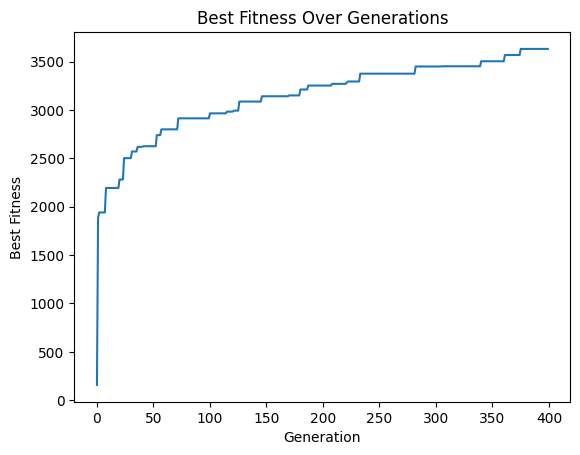

Asset:  Property, plant and equipment , percentage:  40.767126201078874  %
Asset:  Other liabilities , percentage:  5.569750955797334  %
Asset:  Loans and other receivables , percentage:  5.254126048280784  %
Asset:  Retained earnings / accumulated losses , percentage:  4.672355310667884  %
Asset:  Current tax liabilities , percentage:  3.4484868017754735  %
Best Property Structure: [0.40767126201078874, 0.004218042708621799, 0.008064808046892488, 0.008969197566720053, 4.964541042687995e-05, 0.01379229276675633, 0.0021794608514438063, 0.017531750496401616, 0.015507265474521323, 0.009556749308814921, 0.012597465287257754, 0.0007034152632257269, 0.0029726914070191644, 0.00204434462699107, 0.01320217437064121, 0.014979021390393314, 0.007309297192381993, 0.05254126048280784, 0.014945059545772093, 0.012174063894489252, 0.009355349189964508, 0.01985953705850854, 0.0006696061928637972, 0.007872183154341395, 0.0052182919038875645, 0.0012656335415648786, 0.0015661616549636935, 0.001221154118437

In [33]:
model = models['Random Forest']
best_property_structure = evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model)
print('Best Property Structure:', best_property_structure)

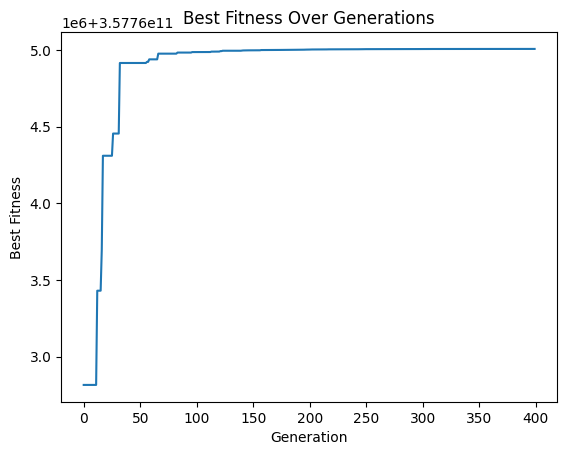

Asset:  Liabilities related to assets held for sale and discontinued operations , percentage:  99.98674727951055  %
Asset:  Provisions , percentage:  0.0011510354830149862  %
Asset:  Inventories , percentage:  0.0011143163022571182  %
Asset:  Current liabilities , percentage:  0.0009682782349475496  %
Asset:  Non-current loans and receivables , percentage:  0.0006940112658476927  %
Best Property Structure: [3.7824449570232425e-06, 4.279444128230635e-06, 3.4060499758498153e-07, 1.2724560784657614e-06, 6.783521328993235e-06, 2.1070946311640858e-06, 3.3720438753992656e-06, 2.153139651725921e-06, 6.940112658476928e-06, 4.544476871672186e-08, 1.5267608535187671e-06, 4.35486657536584e-07, 8.552942802402678e-07, 1.114316302257118e-05, 4.802362346897281e-06, 1.5751638589083742e-08, 1.4193678231492046e-06, 1.828445146897249e-06, 3.902693147711345e-06, 4.324076093265898e-06, 8.912811273355358e-07, 2.478579167172707e-07, 6.158333444013993e-08, 9.246205736371805e-07, 1.4150847704392745e-06, 3.4028

In [71]:
model = models['Linear Regression']
best_property_structure = evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model)
print('Best Property Structure:', best_property_structure)

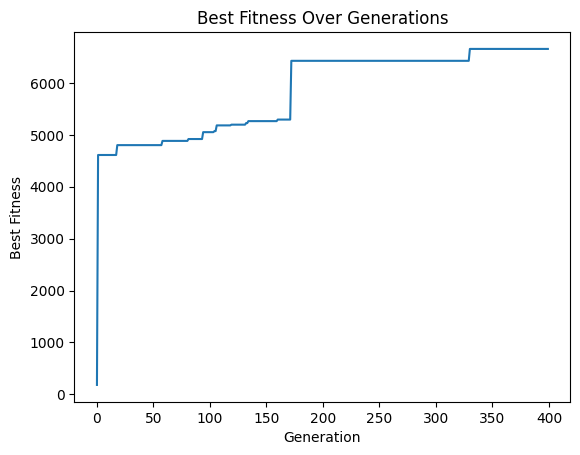

Asset:  Equity shareholders of the parent , percentage:  31.215855422299903  %
Asset:  Current tax liabilities , percentage:  22.192239088539015  %
Asset:  Non-current loans and borrowings , percentage:  16.538348213666833  %
Asset:  Trade payables , percentage:  5.114588713885335  %
Asset:  Goodwill , percentage:  3.67456485712656  %
Best Property Structure: [0.004545418342698156, 0.0051563451930681575, 0.008359688184195866, 0.0367456485712656, 0.0025217057404254106, 0.0022782409828452713, 0.0038075119901215143, 0.0006866969561573684, 0.0032176815686226026, 0.006859538318426275, 0.000791975849278127, 0.004765954571227617, 0.0026739031524011855, 0.0018852931515573048, 0.0023301860559274768, 0.0028753673328002585, 0.002398432079276828, 0.003970143871086895, 0.005969173088250137, 0.000976713382696948, 0.0004597223387250866, 0.0022013989730657333, 0.022604639630996334, 0.002014554057266975, 0.0006340225225860904, 0.001932367177774209, 0.0019088850691895863, 0.003759991883041596, 0.3121585

In [67]:
model = models['Gradient Boosting']
best_property_structure = evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model)
print('Best Property Structure:', best_property_structure)
print(np.sum(best_property_structure))

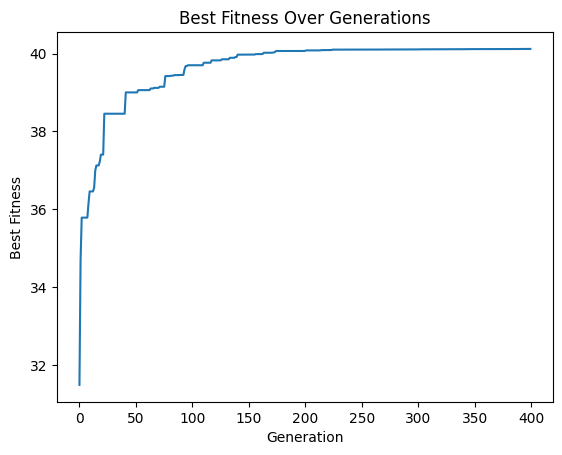

Asset:  Cash and cash equivalents , percentage:  99.91201294095825  %
Asset:  Non-current liabilities , percentage:  0.009870490413578096  %
Asset:  Non-current liabilities from finance leases , percentage:  0.00612637614495872  %
Asset:  Non-controlling interests , percentage:  0.005133659824805839  %
Asset:  Called up capital , percentage:  0.0037616875761005237  %
Best Property Structure: [2.6815492899446688e-06, 1.0456415934225822e-05, 2.914000728712673e-06, 3.552183350003197e-05, 1.5809364252600707e-06, 1.327697357459795e-05, 2.2467275138149145e-05, 6.202653537613982e-07, 1.769829052351065e-05, 2.5354703326824516e-05, 2.583785108842294e-05, 9.714997816892261e-07, 2.5234645531522776e-06, 1.1340229556744076e-05, 2.3433676339881714e-05, 2.928750890550469e-06, 1.649374159628261e-06, 8.953943832526383e-06, 2.0049252037166755e-05, 0.9991201294095825, 1.5756223336628662e-06, 1.156343304940237e-05, 3.499213953142909e-05, 1.1241904214965125e-05, 2.0058352290640114e-05, 3.761687576100524e-0

In [72]:
model = models['Support Vector Machine']
best_property_structure = evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model)
print('Best Property Structure:', best_property_structure)

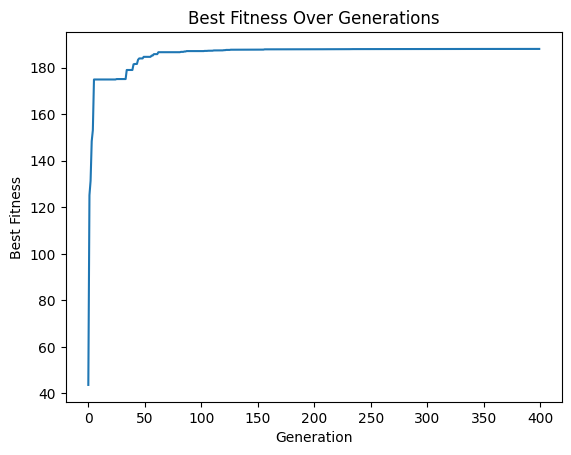

Asset:  Current intangible assets , percentage:  81.29354273571604  %
Asset:  Treasury shares , percentage:  18.666616636639258  %
Asset:  Non-current loans and borrowings , percentage:  0.0033367678388881413  %
Asset:  Deferred income tax , percentage:  0.0026479093721468367  %
Asset:  Supplementary capital , percentage:  0.0021963996344413106  %
Best Property Structure: [7.111472417076734e-06, 2.4375627193064037e-07, 4.094583901941207e-06, 2.513530579692077e-06, 9.330045043236873e-07, 1.1168630723096818e-05, 1.696026257071399e-06, 1.6671468142835105e-05, 1.775567498592964e-06, 2.647909372146837e-05, 1.9677627290715114e-06, 3.651960195981623e-06, 2.1026693576345754e-06, 7.3252307847180515e-06, 0.8129354273571605, 7.99542618869411e-06, 1.586323399883414e-05, 1.0591176782488192e-05, 6.364841526589303e-06, 7.165240238510195e-06, 6.32989565146827e-06, 5.816128302575228e-06, 5.895905017196548e-06, 2.7435842361266415e-06, 5.4650251334914805e-06, 1.1665709261463414e-06, 1.4743686629722592e-0

In [73]:
model = models['Neural Network']
best_property_structure = evolutionary_algorithm(num_generations, population_size, num_properties, mutation_rate, model)
print('Best Property Structure:', best_property_structure)
print(np.sum(best_property_structure))